In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-19 12:24:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 64.233.167.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  14.5MB/s    in 4.5s    

2021-02-19 12:25:02 (14.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# Data pre-processing

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


# BUILDING A MODEL


In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.3),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

# ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# MODEL TRAINING

In [10]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 16s - loss: 0.7438 - accuracy: 0.5520 - val_loss: 0.6629 - val_accuracy: 0.6460
Epoch 2/15
100/100 - 9s - loss: 0.6570 - accuracy: 0.6495 - val_loss: 0.6098 - val_accuracy: 0.6500
Epoch 3/15
100/100 - 9s - loss: 0.5745 - accuracy: 0.7030 - val_loss: 0.5739 - val_accuracy: 0.7030
Epoch 4/15
100/100 - 9s - loss: 0.4951 - accuracy: 0.7600 - val_loss: 0.6710 - val_accuracy: 0.6360
Epoch 5/15
100/100 - 9s - loss: 0.4324 - accuracy: 0.8005 - val_loss: 0.5973 - val_accuracy: 0.7260
Epoch 6/15
100/100 - 9s - loss: 0.3418 - accuracy: 0.8560 - val_loss: 0.7468 - val_accuracy: 0.7060
Epoch 7/15
100/100 - 9s - loss: 0.2713 - accuracy: 0.8805 - val_loss: 0.8169 - val_accuracy: 0.7220
Epoch 8/15
100/100 - 9s - loss: 0.2137 - accuracy: 0.9120 - val_loss: 0.8057 - val_accuracy: 0.6920
Epoch 9/15
100/100 - 9s - loss: 0.1580 - accuracy: 0.9400 - val_loss: 1.1004 - val_accuracy: 0.6800
Epoch 10/15
100/100 - 9s - loss: 0.1213 - accuracy: 0.9510 - val_loss: 1.1034 - val_accuracy: 0.705

In [11]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving _111434467_gettyimages-1143489763.jpg to _111434467_gettyimages-1143489763.jpg
[0.]
_111434467_gettyimages-1143489763.jpg is a cat


# VISUALIZING THE RESULTS

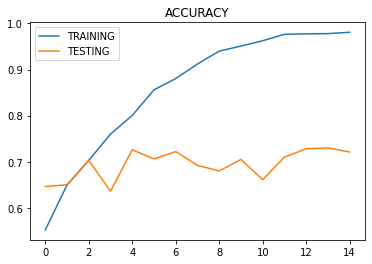

In [29]:
import matplotlib.pyplot as plt
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.title("ACCURACY")

epochs=range(len(acc))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.legend(["TRAINING","TESTING"]);

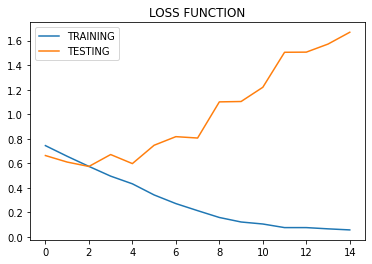

In [30]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(loss))
plt.title("LOSS FUNCTION")
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.legend(["TRAINING","TESTING"]);